In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
A = 'Quality_data.csv'

quality_data = pd.read_csv(A)
quality_data

,Product ID,Product characteristic 1,Quality Characteristic 8,Quality Characteristic 1,Quality Characteristic 2,Quality Characteristic 3,Quality Characteristic 4,Quality Characteristic 5,Quality Characteristic 6,Process Characteristic 1,Process Characteristic 2,Rework characteristic 1,Rework characteristic 2,Repair characteristic 1,Rework Minutes,Quality rating,Capture Date,Rework Date,Quality Characteristic 7
0,26.0,1,A,412,653,248,172,s,a,APU3b,1,I,c,m,0.0,1,01.10.18 06:34:54,01.10.18 06:35:24,0
1,50.0,2,A,408,793,221,147,s,b,APU3b,1,I,b,d,285.0,1,01.10.18 07:23:12,01.10.18 08:13:42,0
2,72.0,1,A,407,608,210,117,s,a,APU3b,4,O,a,b,0.0,1,01.10.18 15:39:57,01.10.18 16:50:40,0
3,72.0,1,A,407,608,248,142,s,a,APU3b,2,I,c,g,0.5,1,01.10.18 07:25:09,01.10.18 07:32:53,0
4,74.0,2,A,408,508,205,176,s,b,APU3b,3,I,b,d,25.0,1,01.10.18 07:51:32,01.10.18 09:41:50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18908,NaN,1,A,407,628,210,122,s,b,APU3b,1,I,a,m,0.0,1,31.01.19 22:15:06,31.01.19 22:15:06,0
18909,NaN,1,A,407,655,229,172,s,b,APU3b,1,I,a,m,0.0,1,31.01.19 22:16:17,31.01.19 22:22:51,0
18910,NaN,2,A,407,657,266,122,s,b,APU3b,1,I,a,b,0.0,1,31.01.19 22:27:37,31.01.19 22:36:22,0
18911,NaN,1,A,407,655,229,172,s,b,APU3b,1,I,a,m,0.0,1,31.01.19 22:43:50,31.01.19 22:50:55,0


In [3]:
quality_data.iloc[2, 0]

72.0

In [4]:
new_quality = quality_data

for i in range(len(quality_data)-1, -1 , -1):
    if np.array(quality_data.iloc[i, 13]) == 'b' or (np.array(quality_data.iloc[i,0]) > 0) == False:
        new_quality = new_quality.drop(new_quality.index[i])

In [5]:
new_quality

,Product ID,Product characteristic 1,Quality Characteristic 8,Quality Characteristic 1,Quality Characteristic 2,Quality Characteristic 3,Quality Characteristic 4,Quality Characteristic 5,Quality Characteristic 6,Process Characteristic 1,Process Characteristic 2,Rework characteristic 1,Rework characteristic 2,Repair characteristic 1,Rework Minutes,Quality rating,Capture Date,Rework Date,Quality Characteristic 7
0,26.0,1,A,412,653,248,172,s,a,APU3b,1,I,c,m,0.0,1,01.10.18 06:34:54,01.10.18 06:35:24,0
1,50.0,2,A,408,793,221,147,s,b,APU3b,1,I,b,d,285.0,1,01.10.18 07:23:12,01.10.18 08:13:42,0
3,72.0,1,A,407,608,248,142,s,a,APU3b,2,I,c,g,0.5,1,01.10.18 07:25:09,01.10.18 07:32:53,0
4,74.0,2,A,408,508,205,176,s,b,APU3b,3,I,b,d,25.0,1,01.10.18 07:51:32,01.10.18 09:41:50,0
5,74.0,2,A,410,508,219,176,s,b,APU3b,3,I,b,d,0.0,1,01.10.18 07:50:14,01.10.18 09:42:16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18878,76600.0,1,A,407,655,282,172,s,b,APU3b,1,I,a,g,0.0,1,31.01.19 20:47:29,31.01.19 20:47:29,0
18879,76606.0,2,A,406,509,216,103,s,a,APU3a,3,O,c,ad,60.0,2,31.01.19 22:02:52,01.02.19 01:02:00,0
18880,76611.0,2,A,407,655,282,172,s,b,APU3b,1,I,a,g,0.0,1,31.01.19 19:23:26,31.01.19 19:23:26,0
18881,76612.0,2,A,407,655,229,172,s,b,APU3b,1,I,c,m,0.4,1,31.01.19 20:23:27,31.01.19 20:32:07,0


In [6]:
#np.array(new_quality.iloc[:, 15:16]) 
np.array(new_quality.iloc[:, 14])

array([  0. , 285. ,   0.5, ...,   0. ,   0.4,   0.4])

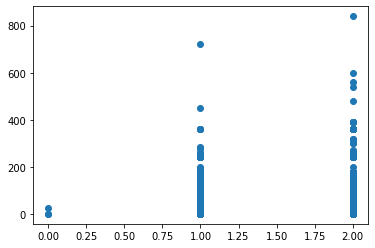

In [7]:
plt.plot(np.array(new_quality.iloc[:, 15]), np.array(new_quality.iloc[:, 14]), 'o')

In [8]:
Y = np.matrix(new_quality.iloc[:, 14])

X = np.matrix(new_quality.iloc[:, 15])

k = len(np.transpose(X))

if np.shape(X)[0] == 1:
    X = np.transpose(X)

X_mod = np.c_[np.ones(k), X]

if np.shape(Y)[0] == 1:
    Y_mod = np.transpose(Y)

In [9]:
np.shape(X_mod)


(12386, 2)

In [10]:
#Y_mod = Y
Y_mod

matrix([[  0. ],
        [285. ],
        [  0.5],
        ...,
        [  0. ],
        [  0.4],
        [  0.4]])

In [11]:
def least_squares_variables():
    A = []
    j = 0
    A_whole = np.linalg.inv(np.transpose(X_mod) * X_mod) * np.transpose(X_mod) * Y_mod
    A.append(A_whole)
    return A
A = least_squares_variables()

In [12]:
# Once the linear coefficents have been calculated, the predicted y-cooridnates can be easily calculated
# as follows.

"Initial line(s) of best fit"

Y_linear = np.zeros(np.shape(X))
j = 0
i = 0
for i in range(k):
    Y_linear[i] =  np.float(A[j][0]) + np.float(A[j][1]) * X[i]

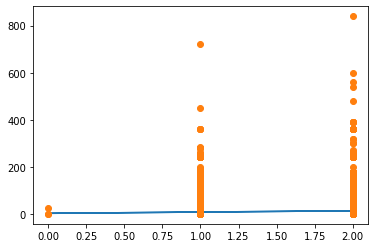

In [13]:
plt.plot(X[:],Y_linear[:])
plt.plot(X[:], Y_mod[:], 'o')

In [14]:
print(new_quality.skew())

Product ID                   0.052374
Product characteristic 1     0.222585
Quality Characteristic 1     1.844316
Quality Characteristic 2     0.086148
Quality Characteristic 3     0.889886
Quality Characteristic 4     0.104282
Process Characteristic 2     0.012699
Rework Minutes               7.535727
Quality rating               1.471586
Quality Characteristic 7     6.544478
dtype: float64


Text(0.5, 1.0, 'Violin plot of Rework Minutes')

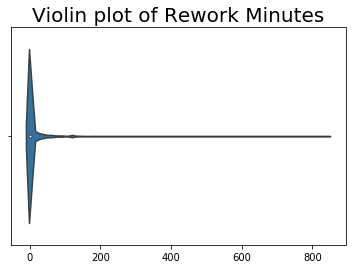

In [15]:
sns.violinplot(Y).set_title("Violin plot of Rework Minutes", size = 20)

Text(0.5, 1.0, 'Violin plot of quality rating')

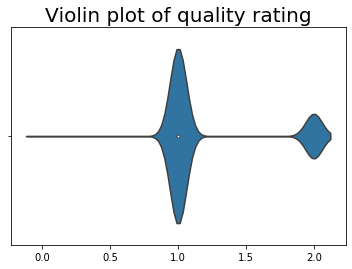

In [16]:
sns.violinplot(X).set_title("Violin plot of quality rating", size = 20)

In [17]:
B = 'Process_disturbances.csv'

process_disturbances = pd.read_csv(B)
process_disturbances

,Start,End,Total duration,Alarm text,Alarm class
0,01/10/2018 01:35,01/10/2018 06:00,15897,a,S
1,01/10/2018 03:04,01/10/2018 06:00,10538,b,E
2,01/10/2018 06:00,01/10/2018 06:00,14,a,S
3,01/10/2018 06:15,01/10/2018 06:16,71,a,S
4,01/10/2018 06:15,01/10/2018 06:16,66,c,O
...,...,...,...,...,...
15631,31/01/2019 11:30,31/01/2019 11:45,906,c,O
15632,31/01/2019 11:52,31/01/2019 11:53,28,a,S
15633,31/01/2019 11:52,31/01/2019 11:53,23,c,O
15634,31/01/2019 11:57,31/01/2019 11:58,33,a,S


In [20]:
C = 'Product_tracking_information.csv'

#tracking points
#Z3200 - entry into process
#Z3299 - exit out of process

track_info = pd.read_csv(C)
track_info

,ZPKT,Format Date,Product ID
0,Z3200,01/10/2018 01:34,147
1,Z3200,01/10/2018 06:00,149
2,Z3299,01/10/2018 06:00,114
3,Z3200,01/10/2018 06:01,156
4,Z3299,01/10/2018 06:01,160
...,...,...,...
142280,Z3299,24/01/2019 20:21,71481
142281,Z3299,24/01/2019 20:28,71492
142282,Z3299,24/01/2019 20:30,71486
142283,Z3299,24/01/2019 20:31,71490


In [21]:
track_info["Product ID"].value_counts()

2047     2
21920    2
46396    2
48445    2
42302    2
        ..
17742    1
23276    1
26148    1
27062    1
5171     1
Name: Product ID, Length: 71177, dtype: int64

In [22]:
quality_data.skew()

Product ID                   0.116218
Product characteristic 1     0.207190
Quality Characteristic 1     2.211331
Quality Characteristic 2     0.129689
Quality Characteristic 3     0.797046
Quality Characteristic 4     0.118523
Process Characteristic 2     0.062819
Rework Minutes               9.107313
Quality rating               1.719865
Quality Characteristic 7     4.287207
dtype: float64

In [23]:
quality_data.iloc[:,1]

0        1
1        2
2        1
3        1
4        2
        ..
18908    1
18909    1
18910    2
18911    1
18912    1
Name: Product characteristic 1, Length: 18913, dtype: int64

In [24]:
ordered_time = new_quality.sort_values(by='Rework Minutes', ascending=True)
ordered_time.iloc[:,14]


0          0.0
8765       0.0
8743       0.0
8741       0.0
8738       0.0
         ...  
2459     540.0
18312    560.0
2805     600.0
3116     720.0
1982     840.0
Name: Rework Minutes, Length: 12386, dtype: float64

In [25]:
high_ordered_time = ordered_time

for i in range(len(ordered_time)-1, -1 , -1):
    if (ordered_time.iloc[i, 14]) == 0 :
        high_ordered_time = high_ordered_time.drop(high_ordered_time.index[i])

In [26]:
np.shape(high_ordered_time)

(4535, 19)

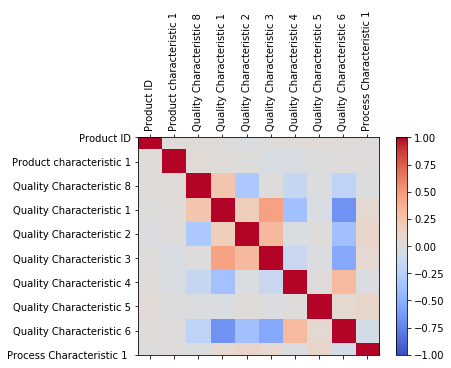

In [27]:
corr = new_quality.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(new_quality.columns)
ax.set_yticklabels(new_quality.columns)
plt.show()

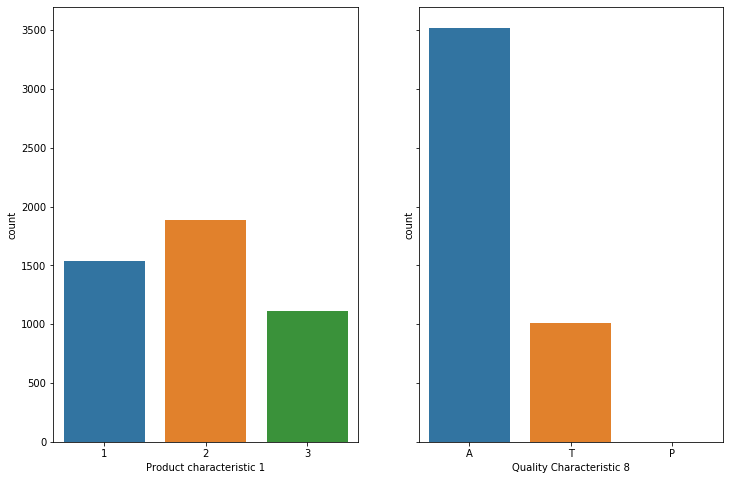

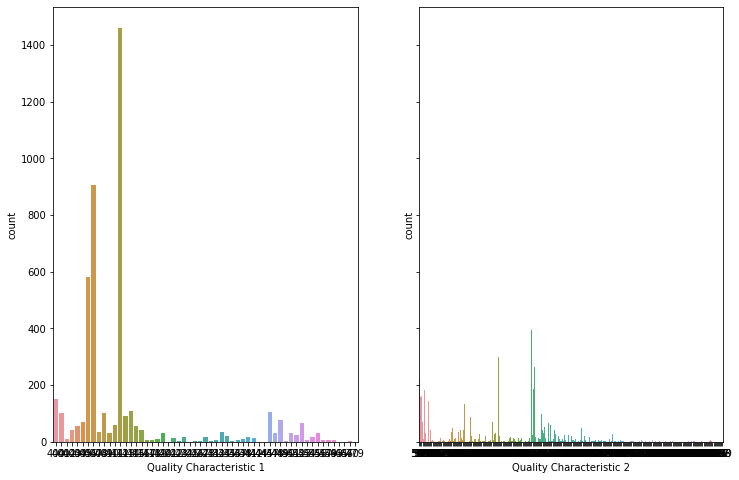

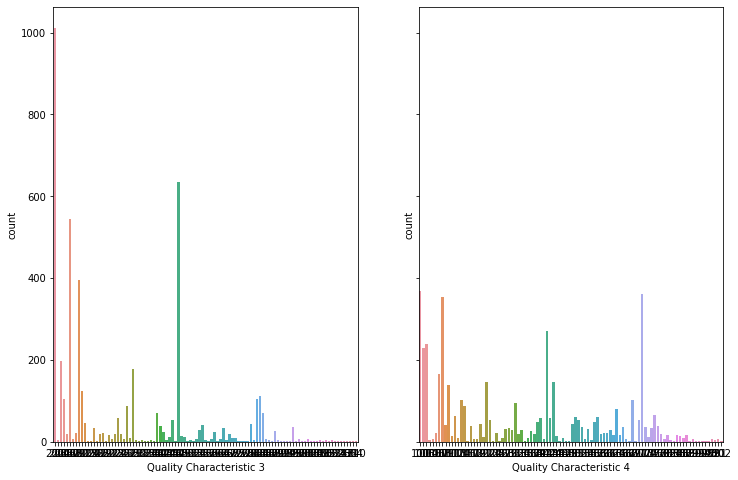

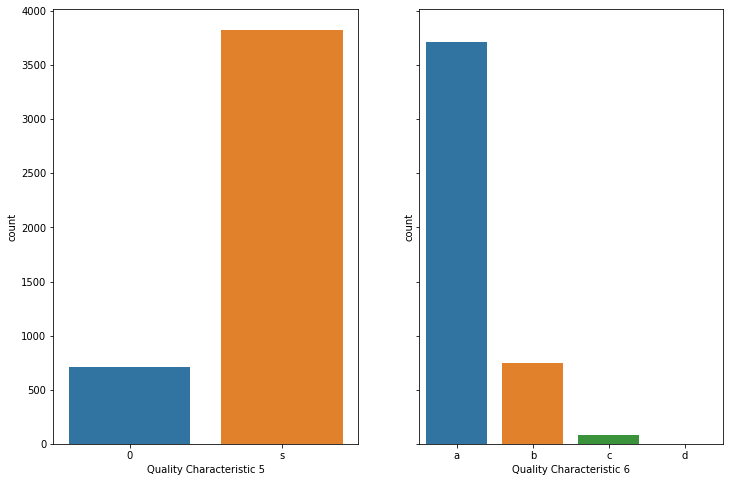

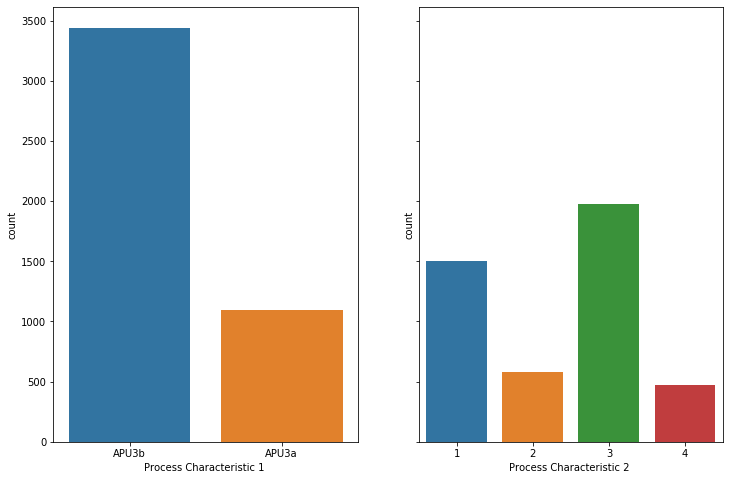

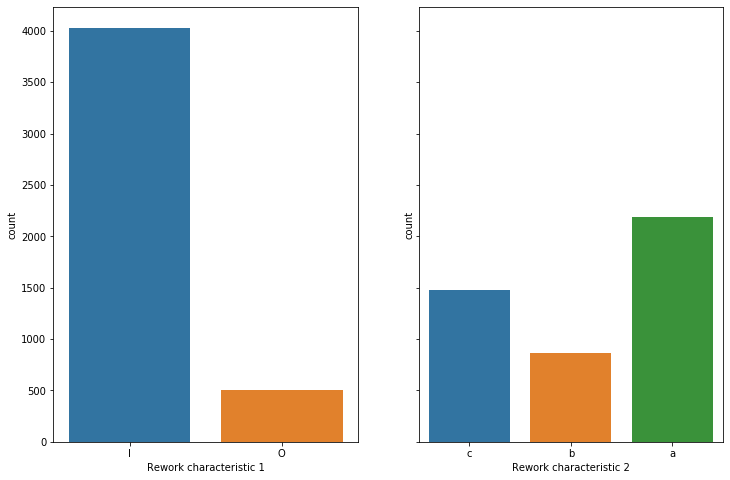

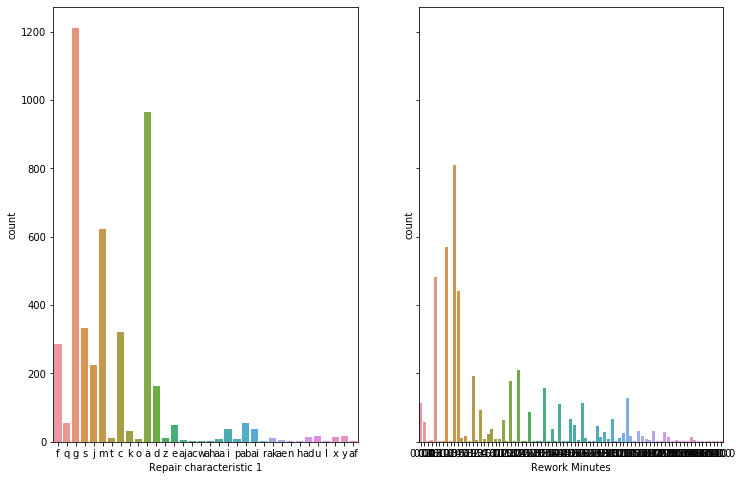

In [28]:
# Count of each label in each category
data = high_ordered_time.iloc[:, 1:15]

#names of all the columns
cols = data.columns

#Plot count plot for all attributes in a 29x4 grid
n_cols = 2
n_rows = 7
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=data, ax=ax[j])

In [29]:
new_quality["Quality Characteristic 6"].value_counts()

a    9577
b    2524
c     282
d       3
Name: Quality Characteristic 6, dtype: int64

In [30]:
new_quality["Rework Minutes"].mean()

9.001797190376115

In [31]:
high_ordered_time["Rework Minutes"].mean()

24.58572436604189

In [32]:
B = 'Process_disturbances.csv'

process_disturbances = pd.read_csv(B)
process_disturbances

,Start,End,Total duration,Alarm text,Alarm class
0,01/10/2018 01:35,01/10/2018 06:00,15897,a,S
1,01/10/2018 03:04,01/10/2018 06:00,10538,b,E
2,01/10/2018 06:00,01/10/2018 06:00,14,a,S
3,01/10/2018 06:15,01/10/2018 06:16,71,a,S
4,01/10/2018 06:15,01/10/2018 06:16,66,c,O
...,...,...,...,...,...
15631,31/01/2019 11:30,31/01/2019 11:45,906,c,O
15632,31/01/2019 11:52,31/01/2019 11:53,28,a,S
15633,31/01/2019 11:52,31/01/2019 11:53,23,c,O
15634,31/01/2019 11:57,31/01/2019 11:58,33,a,S


In [33]:
process_disturbances['Total duration'].max()

1067529

In [34]:
ordered_time = process_disturbances.sort_values('Total duration', ascending=False)
ordered_time = ordered_time.iloc[:,2:5]
ordered_time

,Total duration,Alarm text,Alarm class
10756,1067529,b,E
10757,1059961,a,S
10712,224904,a,S
10715,204243,b,E
6713,173593,a,S
...,...,...,...
11452,1,a,S
8631,1,a,S
8630,1,a,S
11454,1,a,S


In [36]:
le = preprocessing.LabelEncoder()

In [37]:
ordered_time['Alarm text'] = le.fit_transform(np.array(ordered_time.iloc[:,1]))
ordered_time['Alarm class'] = le.fit_transform(np.array(ordered_time.iloc[:,2]))

In [38]:
ort=ordered_time.head(1000)

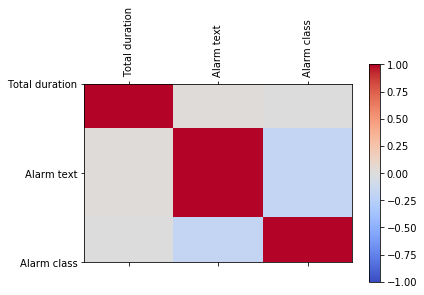

In [39]:
corr = ort.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(ort.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(ort.columns)
ax.set_yticklabels(ort.columns)
plt.show()

In [40]:
C = 'Product_tracking_information.csv'

#tracking points
#Z3200 - entry into process
#Z3299 - exit out of process

track_info = pd.read_csv(C)
track_info

,ZPKT,Format Date,Product ID
0,Z3200,01/10/2018 01:34,147
1,Z3200,01/10/2018 06:00,149
2,Z3299,01/10/2018 06:00,114
3,Z3200,01/10/2018 06:01,156
4,Z3299,01/10/2018 06:01,160
...,...,...,...
142280,Z3299,24/01/2019 20:21,71481
142281,Z3299,24/01/2019 20:28,71492
142282,Z3299,24/01/2019 20:30,71486
142283,Z3299,24/01/2019 20:31,71490


In [41]:
new_quality

,Product ID,Product characteristic 1,Quality Characteristic 8,Quality Characteristic 1,Quality Characteristic 2,Quality Characteristic 3,Quality Characteristic 4,Quality Characteristic 5,Quality Characteristic 6,Process Characteristic 1,Process Characteristic 2,Rework characteristic 1,Rework characteristic 2,Repair characteristic 1,Rework Minutes,Quality rating,Capture Date,Rework Date,Quality Characteristic 7
0,26.0,1,A,412,653,248,172,s,a,APU3b,1,I,c,m,0.0,1,01.10.18 06:34:54,01.10.18 06:35:24,0
1,50.0,2,A,408,793,221,147,s,b,APU3b,1,I,b,d,285.0,1,01.10.18 07:23:12,01.10.18 08:13:42,0
3,72.0,1,A,407,608,248,142,s,a,APU3b,2,I,c,g,0.5,1,01.10.18 07:25:09,01.10.18 07:32:53,0
4,74.0,2,A,408,508,205,176,s,b,APU3b,3,I,b,d,25.0,1,01.10.18 07:51:32,01.10.18 09:41:50,0
5,74.0,2,A,410,508,219,176,s,b,APU3b,3,I,b,d,0.0,1,01.10.18 07:50:14,01.10.18 09:42:16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18878,76600.0,1,A,407,655,282,172,s,b,APU3b,1,I,a,g,0.0,1,31.01.19 20:47:29,31.01.19 20:47:29,0
18879,76606.0,2,A,406,509,216,103,s,a,APU3a,3,O,c,ad,60.0,2,31.01.19 22:02:52,01.02.19 01:02:00,0
18880,76611.0,2,A,407,655,282,172,s,b,APU3b,1,I,a,g,0.0,1,31.01.19 19:23:26,31.01.19 19:23:26,0
18881,76612.0,2,A,407,655,229,172,s,b,APU3b,1,I,c,m,0.4,1,31.01.19 20:23:27,31.01.19 20:32:07,0


In [42]:
new_quality['Quality rating'].value_counts()

1    9875
2    2508
0       3
Name: Quality rating, dtype: int64

In [43]:
new_quality['No.'] = np.arange(len(new_quality))
new_quality

,Product ID,Product characteristic 1,Quality Characteristic 8,Quality Characteristic 1,Quality Characteristic 2,Quality Characteristic 3,Quality Characteristic 4,Quality Characteristic 5,Quality Characteristic 6,Process Characteristic 1,Process Characteristic 2,Rework characteristic 1,Rework characteristic 2,Repair characteristic 1,Rework Minutes,Quality rating,Capture Date,Rework Date,Quality Characteristic 7,No.
0,26.0,1,A,412,653,248,172,s,a,APU3b,1,I,c,m,0.0,1,01.10.18 06:34:54,01.10.18 06:35:24,0,0
1,50.0,2,A,408,793,221,147,s,b,APU3b,1,I,b,d,285.0,1,01.10.18 07:23:12,01.10.18 08:13:42,0,1
3,72.0,1,A,407,608,248,142,s,a,APU3b,2,I,c,g,0.5,1,01.10.18 07:25:09,01.10.18 07:32:53,0,2
4,74.0,2,A,408,508,205,176,s,b,APU3b,3,I,b,d,25.0,1,01.10.18 07:51:32,01.10.18 09:41:50,0,3
5,74.0,2,A,410,508,219,176,s,b,APU3b,3,I,b,d,0.0,1,01.10.18 07:50:14,01.10.18 09:42:16,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18878,76600.0,1,A,407,655,282,172,s,b,APU3b,1,I,a,g,0.0,1,31.01.19 20:47:29,31.01.19 20:47:29,0,12381
18879,76606.0,2,A,406,509,216,103,s,a,APU3a,3,O,c,ad,60.0,2,31.01.19 22:02:52,01.02.19 01:02:00,0,12382
18880,76611.0,2,A,407,655,282,172,s,b,APU3b,1,I,a,g,0.0,1,31.01.19 19:23:26,31.01.19 19:23:26,0,12383
18881,76612.0,2,A,407,655,229,172,s,b,APU3b,1,I,c,m,0.4,1,31.01.19 20:23:27,31.01.19 20:32:07,0,12384


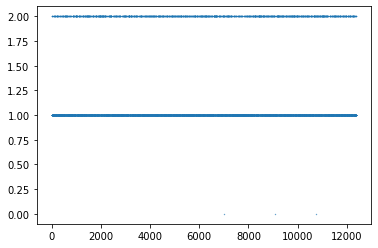

In [44]:
plt.scatter(new_quality.iloc[:,19],new_quality.iloc[:,15], s=0.1)

In [45]:
numero_list = []
numero = 0
for i in range(23):
    numero = new_quality.head(i*821)
    prob = numero['Quality rating'].value_counts('1')
    numero_list.append(prob)

In [46]:
numero_list

[Series([], Name: Quality rating, dtype: float64), 1    0.845311
 2    0.154689
 Name: Quality rating, dtype: float64, 1    0.817296
 2    0.182704
 Name: Quality rating, dtype: float64, 1    0.801462
 2    0.198538
 Name: Quality rating, dtype: float64, 1    0.802984
 2    0.197016
 Name: Quality rating, dtype: float64, 1    0.805359
 2    0.194641
 Name: Quality rating, dtype: float64, 1    0.804507
 2    0.195493
 Name: Quality rating, dtype: float64, 1    0.804768
 2    0.195232
 Name: Quality rating, dtype: float64, 1    0.80268
 2    0.19732
 Name: Quality rating, dtype: float64, 1    0.800514
 2    0.199350
 0    0.000135
 Name: Quality rating, dtype: float64, 1    0.805238
 2    0.194641
 0    0.000122
 Name: Quality rating, dtype: float64, 1    0.801019
 2    0.198871
 0    0.000111
 Name: Quality rating, dtype: float64, 1    0.798315
 2    0.201482
 0    0.000203
 Name: Quality rating, dtype: float64, 1    0.797526
 2    0.202286
 0    0.000187
 Name: Quality rating, dtype: f

In [50]:
numero_list_1 = []
numero_list_2 = []
numero_list_0 = []
for i in range(1,23,1):
    unos = numero_list[i][1]
    numero_list_1.append(unos)
    dos = numero_list[i][2]
    numero_list_2.append(dos)
    #zeros = numero_list[i][0]
    #numero_list_0.append(zeros)

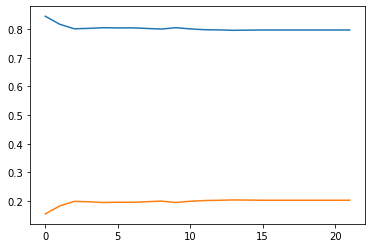

In [51]:
QR1=plt.plot(numero_list_1, label="QR1")
QR2=plt.plot(numero_list_2, label="QR2")
#QR0=plt.plot(numero_list_0, label="QR0")

In [52]:
numero_list1 = []
numero1 = 0
for i in range(23):
    numero1 = new_quality[(i-1)*821:i*821]
    prob = numero1['Quality rating'].value_counts('1')
    numero_list1.append(prob)
numero_list1

[Series([], Name: Quality rating, dtype: float64), 1    0.845311
 2    0.154689
 Name: Quality rating, dtype: float64, 1    0.789281
 2    0.210719
 Name: Quality rating, dtype: float64, 1    0.769793
 2    0.230207
 Name: Quality rating, dtype: float64, 1    0.807552
 2    0.192448
 Name: Quality rating, dtype: float64, 1    0.81486
 2    0.18514
 Name: Quality rating, dtype: float64, 1    0.800244
 2    0.199756
 Name: Quality rating, dtype: float64, 1    0.806334
 2    0.193666
 Name: Quality rating, dtype: float64, 1    0.788063
 2    0.211937
 Name: Quality rating, dtype: float64, 1    0.783191
 2    0.215591
 0    0.001218
 Name: Quality rating, dtype: float64, 1    0.847747
 2    0.152253
 Name: Quality rating, dtype: float64, 1    0.758831
 2    0.241169
 Name: Quality rating, dtype: float64, 1    0.768575
 2    0.230207
 0    0.001218
 Name: Quality rating, dtype: float64, 1    0.788063
 2    0.211937
 Name: Quality rating, dtype: float64, 1    0.778319
 2    0.220463
 0    0.

In [53]:
numero_list_1_1 = []
numero_list_2_1 = []
numero_list_0_1 = []
for i in range(1,23,1):
    unos1 = numero_list1[i][1]
    numero_list_1_1.append(unos1)
    dos1 = numero_list1[i][2]
    numero_list_2_1.append(dos1)
    #zeros1 = numero_list1[i][0]
    #numero_list_0_1.append(zeros1)

IndexError: index out of bounds

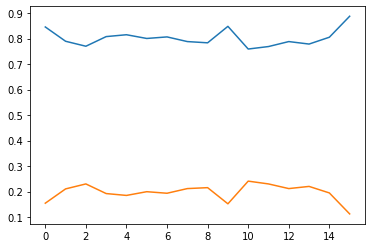

In [54]:
QR1_1=plt.plot(numero_list_1_1, label="QR1")
QR2_1=plt.plot(numero_list_2_1, label="QR2")
#QR0_1=plt.plot(numero_list_0_1, label="QR0")